In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Rent_Percentage

In [3]:
df_rp = pd.read_csv("Rent_Percentage.csv")

In [4]:
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  124 non-null    object 
 1   Rental Year      124 non-null    int64  
 2   Local Authority  124 non-null    object 
 3   UNIT             124 non-null    object 
 4   VALUE            124 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.0+ KB


In [5]:
df_rp.head()

,Statistic Label,Rental Year,Local Authority,UNIT,VALUE
0,Median Individual Tenant Rent as a % of Dispos...,2019,Cork City Council,%,24.7
1,Median Individual Tenant Rent as a % of Dispos...,2019,Clare County Council,%,17.6
2,Median Individual Tenant Rent as a % of Dispos...,2019,Cavan County Council,%,16.8
3,Median Individual Tenant Rent as a % of Dispos...,2019,Cork County Council,%,21.5
4,Median Individual Tenant Rent as a % of Dispos...,2019,Carlow County Council,%,22.0


In [6]:
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  124 non-null    object 
 1   Rental Year      124 non-null    int64  
 2   Local Authority  124 non-null    object 
 3   UNIT             124 non-null    object 
 4   VALUE            124 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.0+ KB


In [7]:
df_rp.describe()

,Rental Year,VALUE
count,124.0,124.000000
mean,2019.0,23.875806
std,0.0,7.572741
min,2019.0,10.200000
25%,2019.0,18.500000
50%,2019.0,22.900000
75%,2019.0,27.900000
max,2019.0,48.100000


In [8]:
df_rp.isnull().sum()

Statistic Label    0
Rental Year        0
Local Authority    0
UNIT               0
VALUE              0
dtype: int64

The *"Rent_Percentage"* dataset contains 5 columns and 124 entries, with no null values. It illustrates the proportion of income tenants spend on rent, categorized by year and local authority.

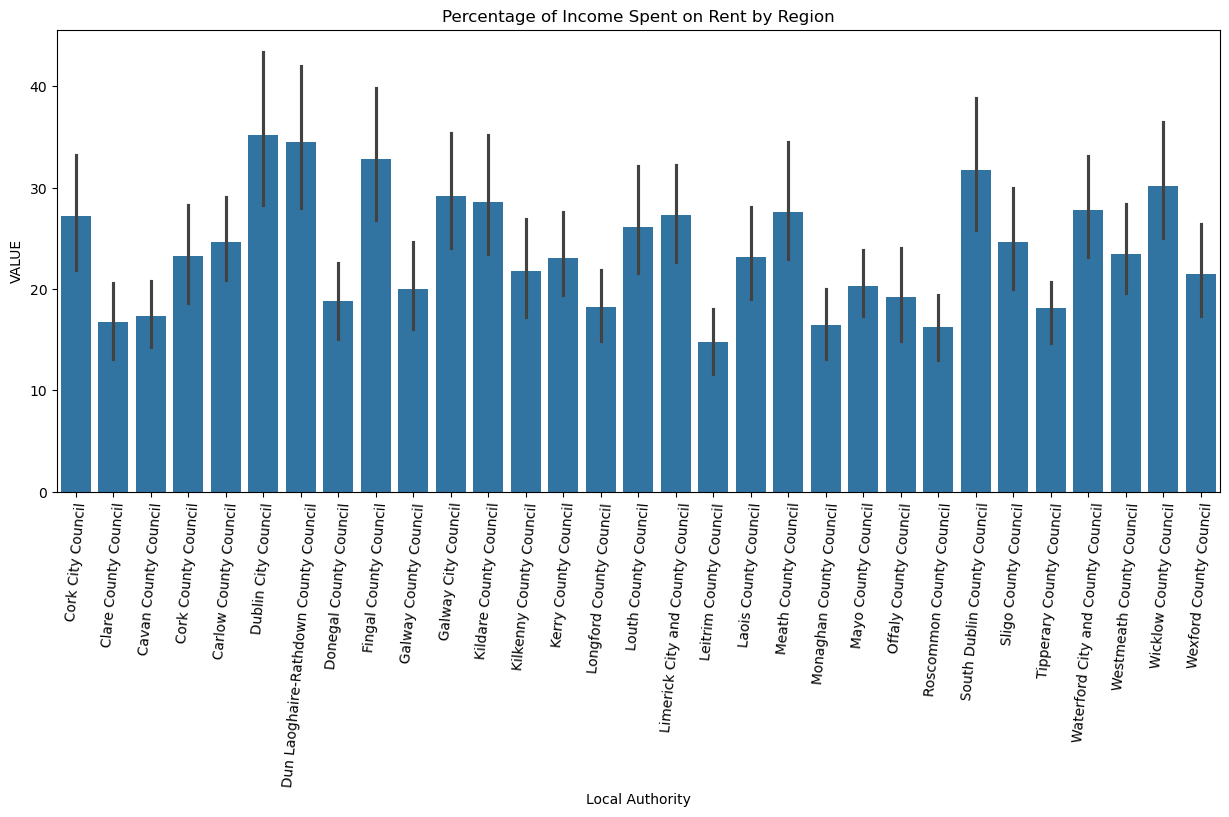

In [10]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Local Authority', y='VALUE', data=df_rp)
plt.title('Percentage of Income Spent on Rent by Region')
plt.xticks(rotation=85)
plt.show()

The graph above indicates that tenants in urban areas, such as Dublin, spend a higher percentage of their income on rent compared to those in rural areas.

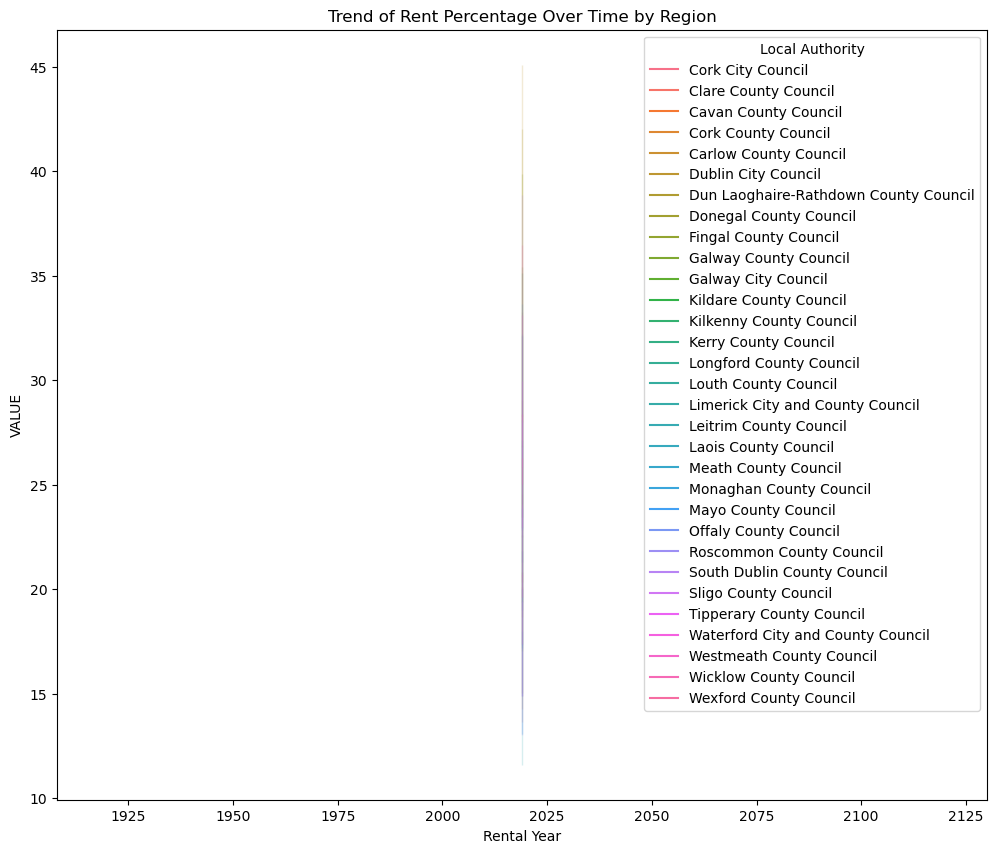

In [12]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Rental Year', y='VALUE', hue='Local Authority', data=df_rp)
plt.title('Trend of Rent Percentage Over Time by Region')
plt.show()

## House_Prices

In [21]:
df_houses = pd.read_csv("House_Prices.csv")

In [22]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334656 entries, 0 to 334655
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Statistic Label   334656 non-null  object 
 1   Month             334656 non-null  object 
 2   Dwelling Status   334656 non-null  object 
 3   Stamp Duty Event  334656 non-null  object 
 4   RPPI Region       334656 non-null  object 
 5   Type of Buyer     334656 non-null  object 
 6   UNIT              334656 non-null  object 
 7   VALUE             333830 non-null  float64
dtypes: float64(1), object(7)
memory usage: 20.4+ MB


In [23]:
df_houses.head()

,Statistic Label,Month,Dwelling Status,Stamp Duty Event,RPPI Region,Type of Buyer,UNIT,VALUE
0,Moving 12 Month Mean Sale Price,2010 December,All Dwelling Statuses,Filings,All,All Buyer Types,Euro,259847.0
1,Moving 12 Month Mean Sale Price,2010 December,All Dwelling Statuses,Filings,All,Household Buyer - First-Time Buyer Owner-Occupier,Euro,237651.0
2,Moving 12 Month Mean Sale Price,2010 December,All Dwelling Statuses,Filings,All,Household Buyer - Former Owner-Occupier,Euro,323971.0
3,Moving 12 Month Mean Sale Price,2010 December,All Dwelling Statuses,Filings,All,Household Buyer - Non-Occupier,Euro,195862.0
4,Moving 12 Month Mean Sale Price,2010 December,All Dwelling Statuses,Filings,Border Excluding Louth,All Buyer Types,Euro,177285.0


In [24]:
df_houses = df_houses.drop(columns = [ 'Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer', 'UNIT'])
df_houses.head()                    

,Month,RPPI Region,VALUE
0,2010 December,All,259847.0
1,2010 December,All,237651.0
2,2010 December,All,323971.0
3,2010 December,All,195862.0
4,2010 December,Border Excluding Louth,177285.0


In [26]:
df_houses.isnull().sum()

Month            0
RPPI Region      0
VALUE          826
dtype: int64

In [27]:
df_houses_cleaned = df_houses.dropna()

In [28]:
df_houses_cleaned.isnull().sum()

Month          0
RPPI Region    0
VALUE          0
dtype: int64

The "House_Prices" dataset contains 8 columns and 334,656 entries, with 826 null values in the VALUE column. After removing the missing values, the dataset now totals 333,830 entries. It is well-organized by year, regions and value, with no significant missing data relative to the total number of entries.


In [31]:
df_houses_cleaned = df_houses_cleaned.copy()
df_houses_cleaned['Month'] = pd.to_datetime(df_houses_cleaned['Month'], format='%Y %B')


In [37]:
df_houses_cleaned['Month'].head()

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
Name: Month, dtype: datetime64[ns]

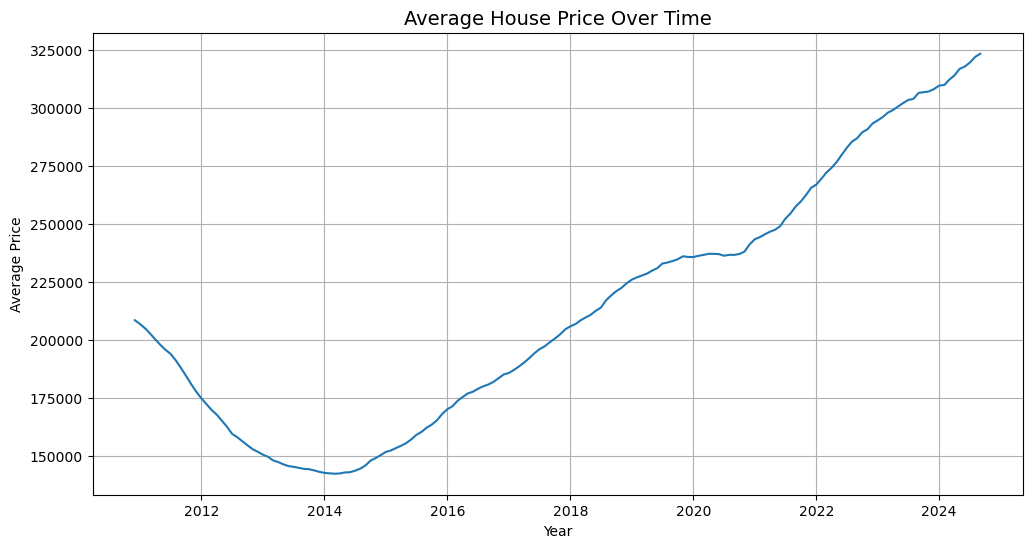

In [42]:
# Group by Month to calculate the average price
avg_price_per_month = df_houses_cleaned.groupby('Month')['VALUE'].mean().reset_index()

# Line plot for average house prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_month, x='Month', y='VALUE')
plt.title('Average House Price Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

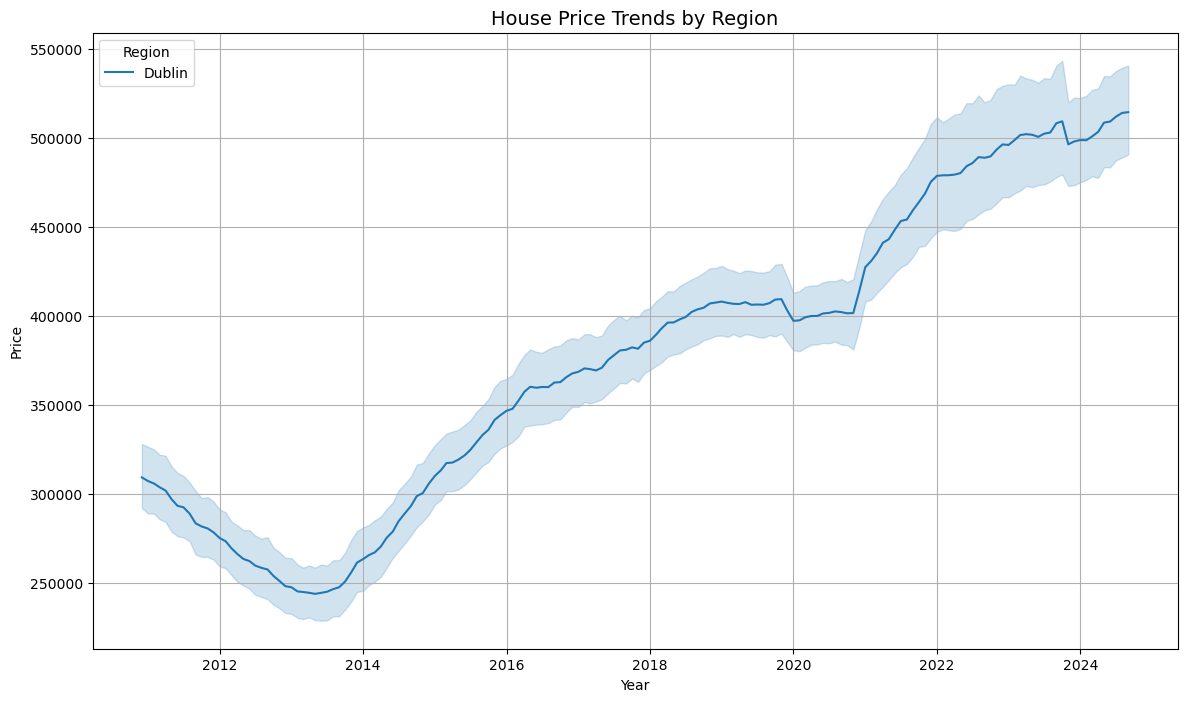

In [44]:
region_to_plot = ['Dublin']  
filtered_data = df_houses_cleaned[df_houses_cleaned['RPPI Region'].isin(region_to_plot)]

# Line plot by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Month', y='VALUE', hue='RPPI Region')
plt.title('House Price Trends by Region', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Region')
plt.grid(True)
plt.show()

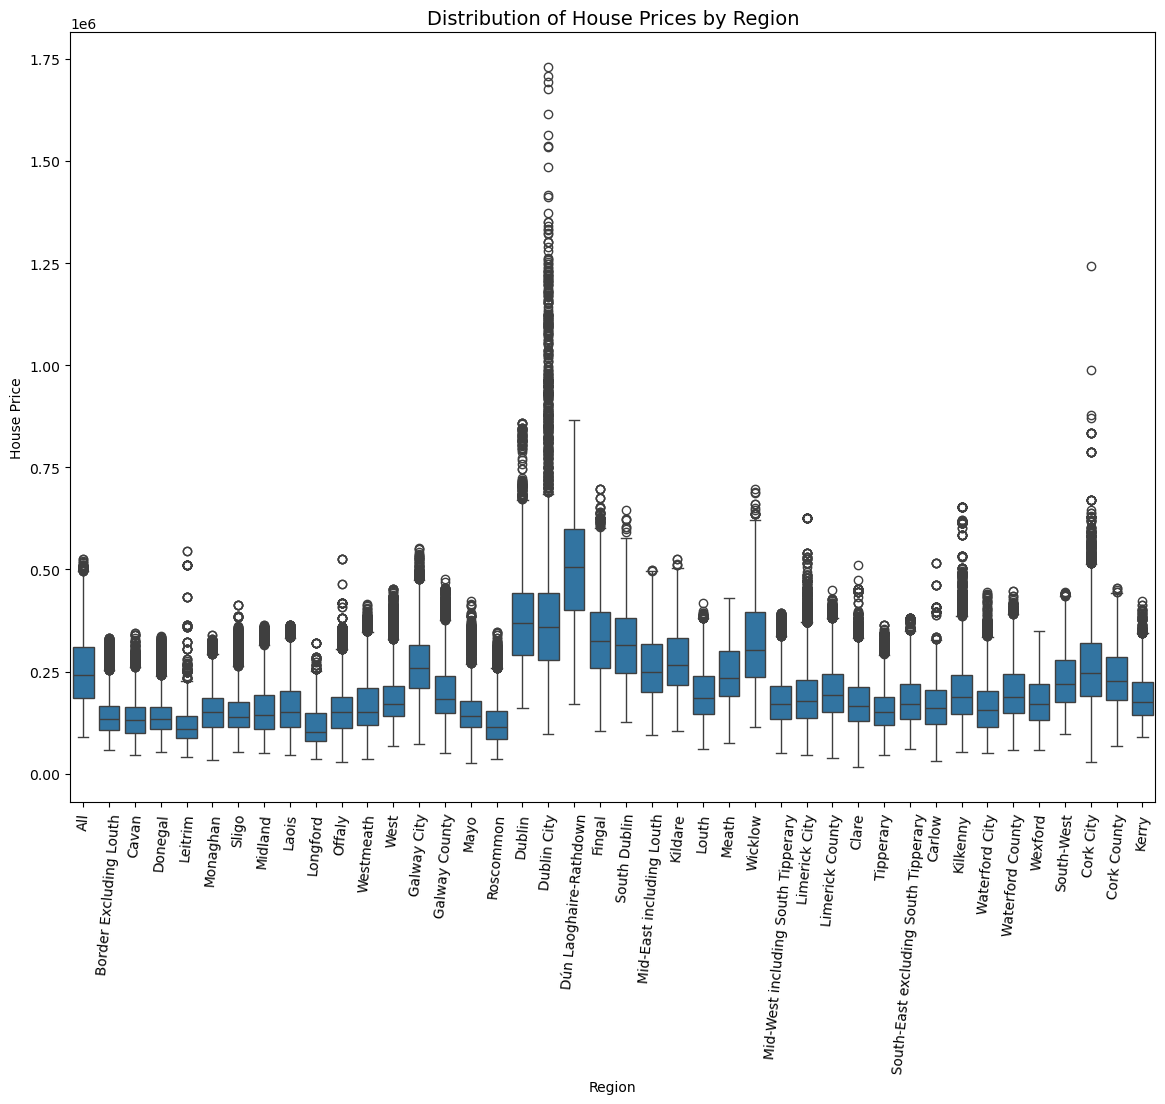

In [45]:
# Boxplot for house prices by region
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_houses_cleaned, x='RPPI Region', y='VALUE')
plt.title('Distribution of House Prices by Region', fontsize=14)
plt.xticks(rotation=85)
plt.xlabel('Region')
plt.ylabel('House Price')
plt.show()

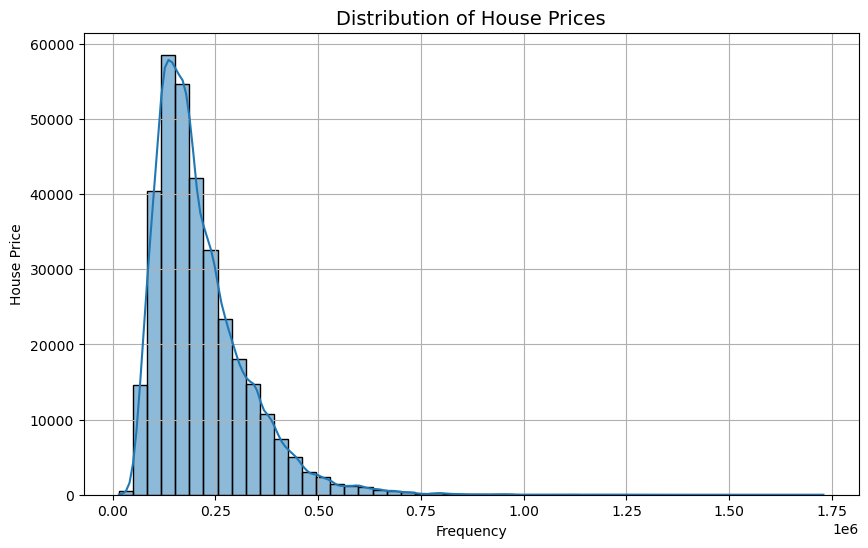

In [46]:
# Histogram for house price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_houses_cleaned['VALUE'], bins=50, kde=True)
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('House Price')
plt.grid(True)
plt.show()

These prices have been steadily increasing in metropolitan areas, while rural areas show smaller changes. 

In [50]:
df_sample = df.sample(n=5000, random_state=42)

# Features e target
X = df_sample[['Year', 'Month_Num', 'RPPI Region']]
y = df_sample['VALUE']

categorical_cols = ['RPPI Region']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' 
)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }


results_df = pd.DataFrame(results).T
display(results_df)


,RMSE,MAE,R2
Linear Regression,65576.634328,46432.769966,0.689084
Random Forest,68961.261975,46827.461068,0.656161
Gradient Boosting,64450.144349,45587.647444,0.699674


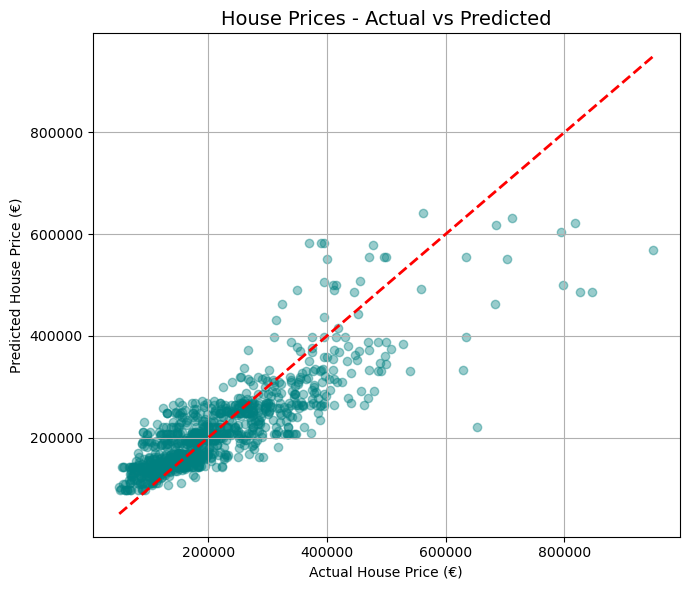

In [54]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('House Prices - Actual vs Predicted', fontsize=14)
plt.xlabel('Actual House Price (€)')
plt.ylabel('Predicted House Price (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

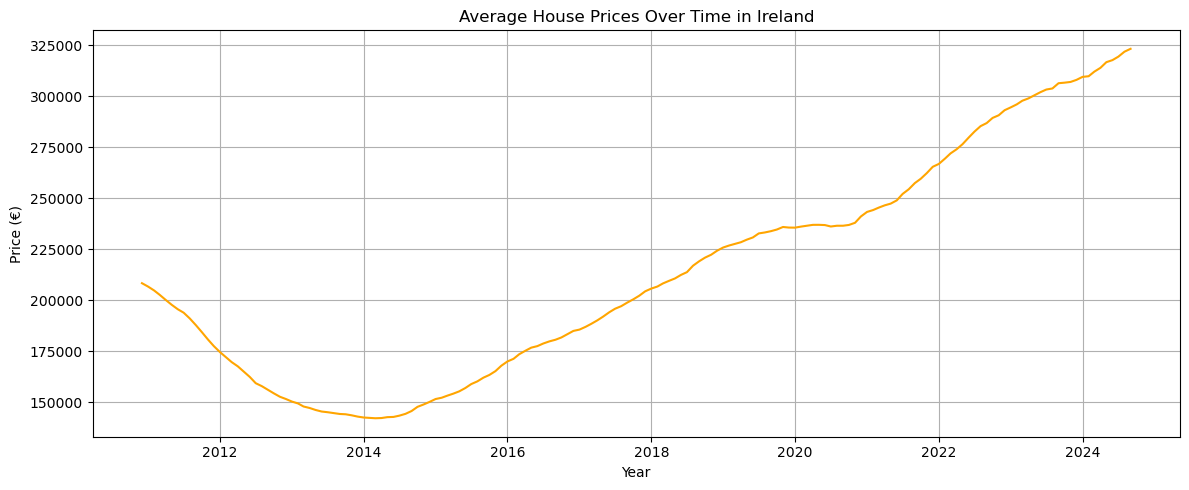

In [56]:
monthly_avg = df.groupby('Month')['VALUE'].mean().reset_index()


monthly_avg.set_index('Month', inplace=True)


plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg['VALUE'], color='orange', label='Average House Price')
plt.title('Average House Prices Over Time in Ireland')
plt.xlabel('Year')
plt.ylabel('Price (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
import statsmodels.api as sm

monthly_avg = df.groupby('Month')['VALUE'].mean().reset_index()
monthly_avg.set_index('Month', inplace=True)
monthly_avg = monthly_avg.asfreq('MS')  # garantir frequência mensal contínua

#SARIMA
model = sm.tsa.statespace.SARIMAX(
    monthly_avg['VALUE'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)


forecast = results.get_forecast(steps=36)
forecast_index = pd.date_range(start=monthly_avg.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
forecast_values = forecast.predicted_mean.astype(np.float64).values
confidence_int = forecast.conf_int()
confidence_int.index = forecast_index
ci_lower = confidence_int.iloc[:, 0].astype(np.float64).values
ci_upper = confidence_int.iloc[:, 1].astype(np.float64).values

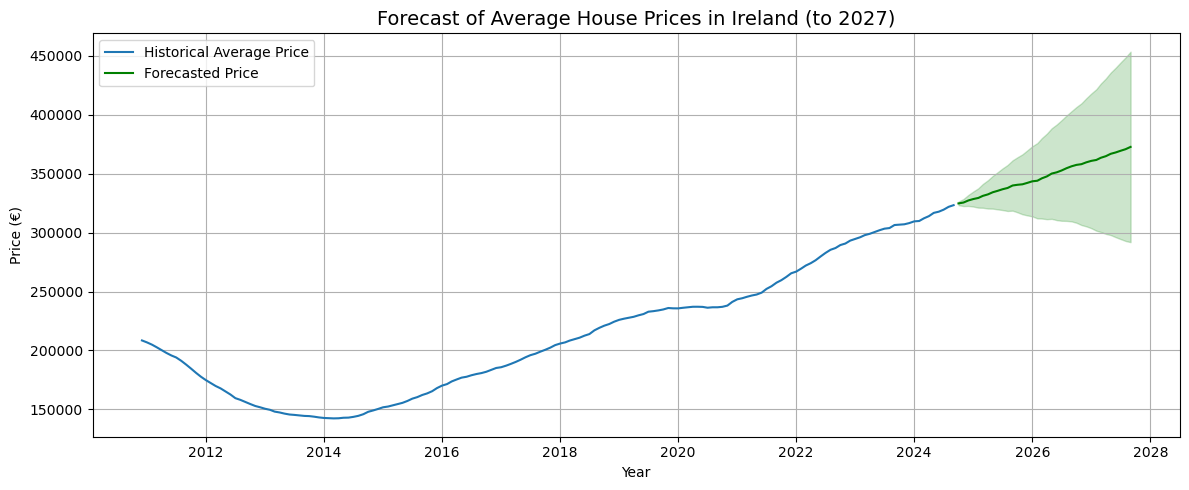

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg['VALUE'], label='Historical Average Price')
plt.plot(forecast_index, forecast_values, label='Forecasted Price', color='green')
plt.fill_between(forecast_index, ci_lower, ci_upper, color='green', alpha=0.2)
plt.title('Forecast of Average House Prices in Ireland (to 2027)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## RTB_Average_Monthly_Rent_Report

In [111]:
df_rent = pd.read_csv("RTB_Average_Monthly_Rent_Report.csv")

In [112]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393372 entries, 0 to 393371
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATISTIC Label     393372 non-null  object 
 1   Quarter             393372 non-null  object 
 2   Number of Bedrooms  393372 non-null  object 
 3   Property Type       393372 non-null  object 
 4   Location            393372 non-null  object 
 5   UNIT                393372 non-null  object 
 6   VALUE               97088 non-null   float64
dtypes: float64(1), object(6)
memory usage: 21.0+ MB


In [115]:
df_rent.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2019Q1,All bedrooms,All property types,Carlow,Euro,779.71
1,RTB Average Monthly Rent Report,2019Q1,All bedrooms,All property types,Carlow Town,Euro,793.13
2,RTB Average Monthly Rent Report,2019Q1,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,843.86
3,RTB Average Monthly Rent Report,2019Q1,All bedrooms,All property types,"Tullow, Carlow",Euro,757.66
4,RTB Average Monthly Rent Report,2019Q1,All bedrooms,All property types,Cavan,Euro,618.55


In [117]:
df_rent = df_rent.drop(columns = [ 'STATISTIC Label', 'Number of Bedrooms', 'Property Type', 'UNIT'])
df_rent.head()                    

,Quarter,Location,VALUE
0,2019Q1,Carlow,779.71
1,2019Q1,Carlow Town,793.13
2,2019Q1,"Graiguecullen, Carlow",843.86
3,2019Q1,"Tullow, Carlow",757.66
4,2019Q1,Cavan,618.55


In [119]:
df_rent.isnull().sum()

Quarter          0
Location         0
VALUE       296284
dtype: int64

In [121]:
# Checking missing values by location
missing_by_location = df_rent[df_rent['VALUE'].isnull()]['Location'].value_counts()
print(missing_by_location)

Location
St Margarets Road, Dublin 11    882
Railway Square, Waterford       882
Ford, Wexford                   882
Ballytruckle, Waterford         882
Lough Gill, Sligo               882
                               ... 
Limerick                        111
Cork City                        98
Galway                           87
Cork                             51
Dublin                           15
Name: count, Length: 446, dtype: int64


In [123]:
# Check missing values by quarter
missing_by_quarter = df_rent[df_rent['VALUE'].isnull()]['Quarter'].value_counts()
print(missing_by_quarter)

Quarter
2024Q1    15999
2023Q1    15354
2023Q2    15216
2023Q4    15191
2023Q3    15078
2022Q1    14912
2022Q2    14763
2022Q4    14620
2022Q3    14613
2021Q4    14121
2021Q1    13761
2021Q2    13695
2021Q3    13560
2020Q2    13322
2020Q1    13313
2020Q4    13243
2020Q3    13205
2019Q1    13145
2019Q4    13129
2019Q2    13074
2019Q3    12970
Name: count, dtype: int64


In [125]:
# Fill remaining missing values using the median for the broader location group
df_rent['VALUE'] = df_rent.groupby(['Location'])['VALUE'].transform(
    lambda x: x.fillna(x.median())
)

# Fill any remaining missing values with the overall median
overall_median = df_rent['VALUE'].median()
df_rent['VALUE'] = df_rent['VALUE'].fillna(overall_median)

In [127]:
df_rent['VALUE'].isnull().sum()

0

In [129]:
df_rent.isnull().sum()

Quarter     0
Location    0
VALUE       0
dtype: int64

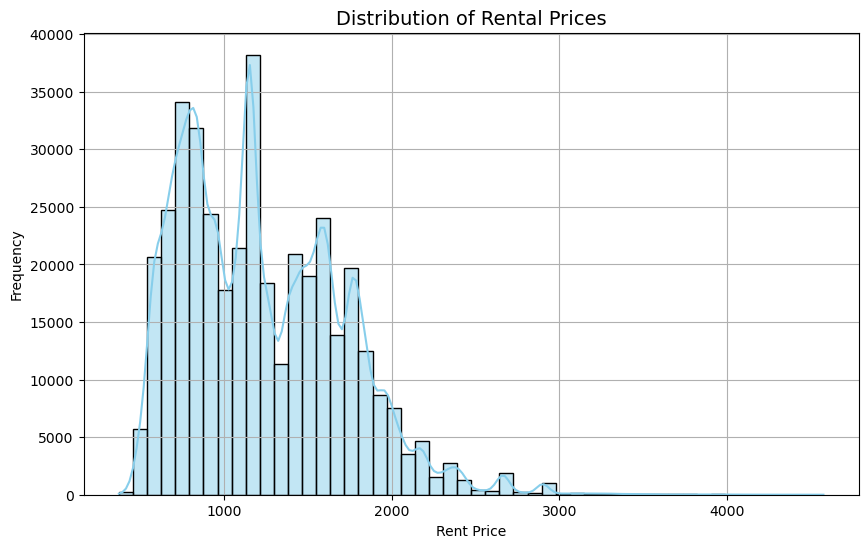

In [131]:
# Histogram for the distribution of rental prices
plt.figure(figsize=(10, 6))
sns.histplot(df_rent['VALUE'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of Rental Prices', fontsize=14)
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

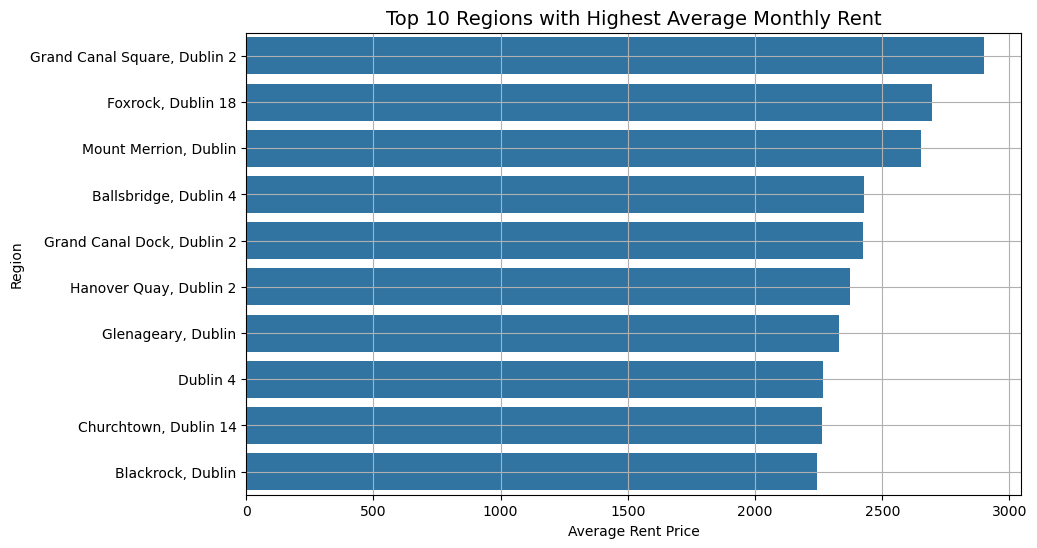

In [132]:
avg_rent_by_region = df_rent.groupby('Location')['VALUE'].mean().reset_index()
avg_rent_by_region = avg_rent_by_region.sort_values(by='VALUE', ascending=False)

# Filter for top 10 regions with highest average rents
top_regions = avg_rent_by_region.head(10)

# Bar chart for top 10 regions
plt.figure(figsize=(10, 6))
sns.barplot(x='VALUE', y='Location', data=top_regions)
plt.title('Top 10 Regions with Highest Average Monthly Rent', fontsize=14)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.grid(True)
plt.show()

In [135]:
top_10_locations = [
    'Grand Canal Square, Dublin 2',
    'Foxrock, Dublin 18',
    'Mount Merrion, Dublin',
    'Ballsbridge, Dublin 4',
    'Grand Canal Dock, Dublin 2',
    'Hanover Quay, Dublin 2',
    'Glenageary, Dublin',
    'Sandymount, Dublin 4',
    'Donnybrook, Dublin 4',
    'Dalkey, Dublin'
]

df_top10 = df_rent[df_rent['Location'].isin(top_10_locations)].copy()

In [137]:
X = df_top10.drop(columns=['VALUE'])
y = df_top10['VALUE']

In [139]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [141]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }


results_df = pd.DataFrame(results).T
results_df

,RMSE,MAE,R2
Linear Regression,274.569484,109.062049,0.453475
Random Forest,280.345764,109.325091,0.430238
Gradient Boosting,275.820800,106.437856,0.448482


In [143]:
#Random sampling of the complete dataset

df_sample = df_rent.sample(n=5000, random_state=42)
X = df_sample.drop(columns='VALUE')
y = df_sample['VALUE']

# preprossessing

categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

#models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }


results_df = pd.DataFrame(results).T
results_df

,RMSE,MAE,R2
Linear Regression,130.381782,59.228842,0.927061
Random Forest,133.234362,53.915291,0.923835
Gradient Boosting,410.851736,355.355969,0.275741


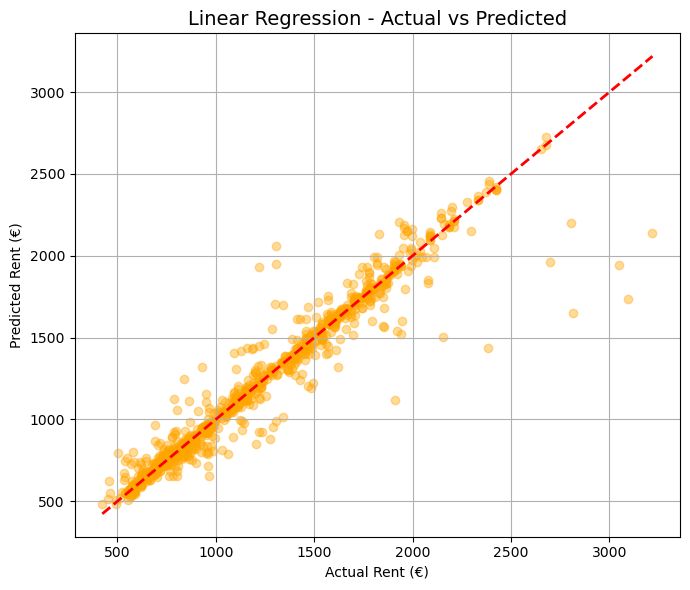

In [153]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression - Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Rent (€)')
plt.ylabel('Predicted Rent (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Consumer_Price_Index

In [43]:
df_consumer = pd.read_csv("Consumer_Price_Index.csv")

In [44]:
df_consumer.head()

,Statistic Label,Month,Detailed Sub Indices,UNIT,VALUE
0,Consumer Price Index,2003 January,All items,Base Dec 2023=100,69.3
1,Consumer Price Index,2003 January,Food and non-alcoholic beverages,Base Dec 2023=100,90.6
2,Consumer Price Index,2003 January,Food,Base Dec 2023=100,90.8
3,Consumer Price Index,2003 January,Bread and cereals,Base Dec 2023=100,87.3
4,Consumer Price Index,2003 January,Rice,Base Dec 2023=100,94.7


In [45]:
df_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183924 entries, 0 to 183923
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Statistic Label       183924 non-null  object 
 1   Month                 183924 non-null  object 
 2   Detailed Sub Indices  183924 non-null  object 
 3   UNIT                  183924 non-null  object 
 4   VALUE                 182070 non-null  float64
dtypes: float64(1), object(4)
memory usage: 7.0+ MB


In [46]:
df_consumer.isnull().sum()

Statistic Label            0
Month                      0
Detailed Sub Indices       0
UNIT                       0
VALUE                   1854
dtype: int64

In [47]:
df_consumer_cleaned = df_consumer.dropna()

In [48]:
df_consumer_cleaned.isnull().sum()

Statistic Label         0
Month                   0
Detailed Sub Indices    0
UNIT                    0
VALUE                   0
dtype: int64

In [49]:
df_consumer_cleaned["Detailed Sub Indices"].unique()

array(['All items', 'Food and non-alcoholic beverages', 'Food',
       'Bread and cereals', 'Rice', 'Flours and other cereals', 'Bread',
       'Other bakery products', 'Pizza and quiche',
       'Pasta products and couscous', 'Breakfast cereals',
       'Other cereal products', 'Meat', 'Beef and veal', 'Pork',
       'Lamb and goat', 'Poultry', 'Edible offal',
       'Dried, salted or smoked meat', 'Other meat preparations', 'Fish',
       'Fresh or chilled fish', 'Frozen fish', 'Fresh or chilled seafood',
       'Dried, smoked or salted fish and seafood',
       'Other preserved or processed fish and seafood-based preparations',
       'Milk, cheese and eggs', 'Fresh whole milk', 'Fresh low fat milk',
       'Yoghurt', 'Cheese and curd', 'Other milk products', 'Eggs',
       'Oils and fats', 'Butter', 'Margarine and other vegetable fats',
       'Olive oil', 'Other edible oils', 'Fruit',
       'Fresh or chilled fruit', 'Dried fruit and nuts',
       'Preserved fruit and fruit-based 

## RTB_Tenants

In [51]:
df_tenants = pd.read_csv("RTB_Tenants.csv")

In [52]:
df_tenants.head()

,Statistic Label,Rental Year,Total Gross Income Groups,UNIT,VALUE
0,Percentage of RTB Tenants,2019,"Up to €9,999",%,11.5
1,Percentage of RTB Tenants,2019,"€10,000-€19,999",%,24.3
2,Percentage of RTB Tenants,2019,"€20,000-€29,999",%,22.1
3,Percentage of RTB Tenants,2019,"€30,000-€39,999",%,16.0
4,Percentage of RTB Tenants,2019,"€40,000-€49,999",%,9.3


In [53]:
df_tenants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Statistic Label            11 non-null     object 
 1   Rental Year                11 non-null     int64  
 2   Total Gross Income Groups  11 non-null     object 
 3   UNIT                       11 non-null     object 
 4   VALUE                      11 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 572.0+ bytes


In [54]:
df_tenants = df_tenants.drop(columns = [ 'Statistic Label', 'UNIT'])
df_tenants.head() 

,Rental Year,Total Gross Income Groups,VALUE
0,2019,"Up to €9,999",11.5
1,2019,"€10,000-€19,999",24.3
2,2019,"€20,000-€29,999",22.1
3,2019,"€30,000-€39,999",16.0
4,2019,"€40,000-€49,999",9.3


In [55]:
df_tenants.isnull().sum()

Rental Year                  0
Total Gross Income Groups    0
VALUE                        0
dtype: int64

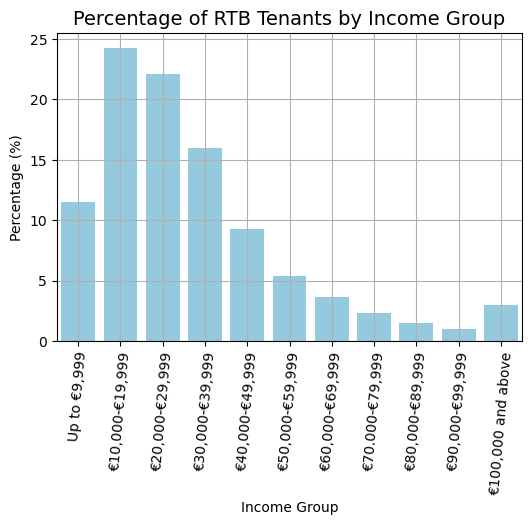

In [56]:
# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=df_tenants, x='Total Gross Income Groups', y='VALUE', color='skyblue')
plt.title('Percentage of RTB Tenants by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

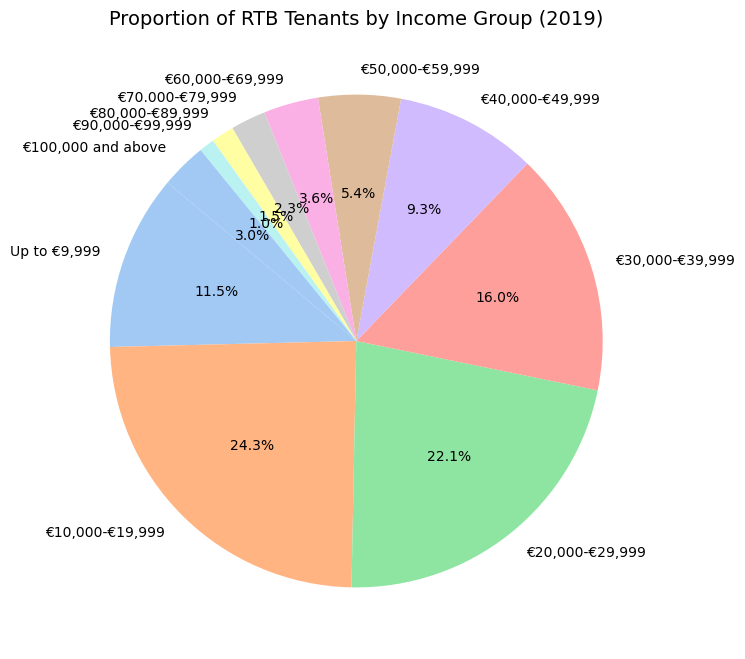

In [57]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_tenants['VALUE'], labels=df_tenants['Total Gross Income Groups'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of RTB Tenants by Income Group (2019)', fontsize=14)
plt.show()

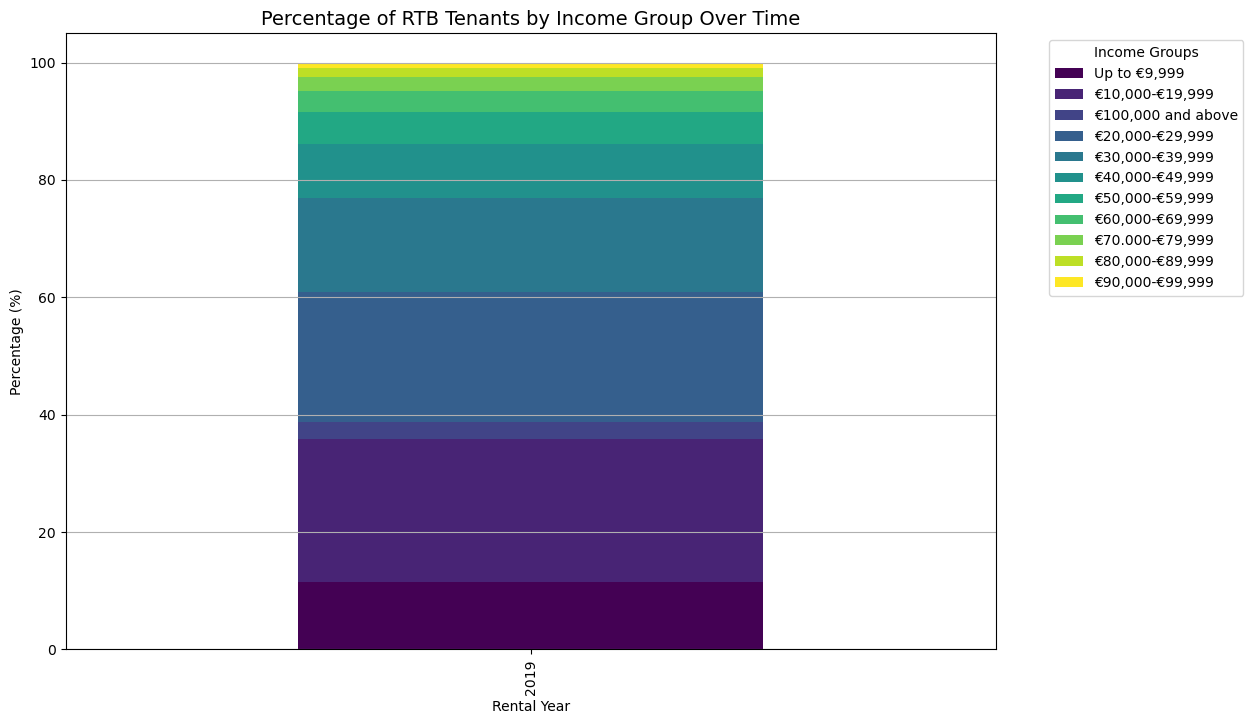

In [58]:
# Pivot data for stacked bar chart
df_pivot = df_tenants.pivot(index='Rental Year', columns='Total Gross Income Groups', values='VALUE')

# Stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Percentage of RTB Tenants by Income Group Over Time', fontsize=14)
plt.xlabel('Rental Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Income Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()